NBO - existing priority customer with min MOB 6 Months and do not have wealth product

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
pd.options.mode.chained_assignment = None
import warnings
warnings.simplefilter(action='ignore') #, category=FutureWarning
import datetime

from sklearn.preprocessing import LabelEncoder
import pickle

df , meta = pyreadstat.read_sas7bdat('dataset_wm0.sas7bdat')
print(df.shape)
df.head()

(149610, 402)


,period,gcn_number,no_td,no_mtg,no_cc,no_pl,no_ol,no_wm,wm,BOND,...,Branch_freq_L6M,Branch_amt_L6M,API_freq_L6M,API_amt_L6M,PEB_freq_L6M,PEB_amt_L6M,PMOBX_freq_L6M,PMOBX_amt_L6M,PNET_freq_L6M,PNET_amt_L6M
0,2202.0,A9A0120000000019,Y,Y,Y,Y,Y,Y,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2202.0,A9A0510000000055,Y,Y,N,Y,Y,Y,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.333333,8.523333e+05,NaN,NaN
2,2202.0,A9A0710000000045,N,Y,N,Y,Y,Y,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2202.0,A9A0810000000052,N,Y,Y,Y,Y,Y,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.500000,1.664500e+07,NaN,NaN
4,2202.0,A9A0920000000008,N,Y,Y,Y,Y,Y,0.0,0.0,...,1.0,5838000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149610 entries, 0 to 149609
Columns: 402 entries, period to PNET_amt_L6M
dtypes: float64(375), object(27)
memory usage: 458.9+ MB


In [9]:
columns = ['PPC','latest_product_month','age','vintage_month','AUM','outstanding','COUNT_CA','CURR_BAL_CA','COUNT_SA','CURR_BAL_SA','COUNT_TD','CURR_BAL_TD','short_tenor_day','long_tenor_day','COUNT_BA','CURR_BAL_BA','COUNT_MF','CURR_BAL_MF','COUNT_BOND','CURR_BAL_BOND','COUNT_CC','CURR_OTD_CC','cc_available_crd_lmt_pct','COUNT_PL','CURR_OTD_PL','COUNT_MG','CURR_OTD_MG','COUNT_JF','CURR_OTD_JF','COUNT_OL','CURR_OTD_OL','avg_bal_ca_L1M','avg_bal_sa_L1M','avg_AUM_L3M','avg_outstanding_L3M','avg_bal_ca_L3M','avg_bal_sa_L3M','avg_bal_td_L3M','avg_bal_ba_L3M','avg_bal_mf_L3M','avg_bal_bond_L3M','avg_bal_cc_L3M','avg_bal_pl_L3M','avg_bal_mg_L3M','avg_bal_jf_L3M','avg_bal_ol_L3M','avg_AUM_L6M','avg_outstanding_L6M','avg_bal_ca_L6M','avg_bal_sa_L6M','avg_bal_td_L6M','avg_bal_ba_L6M','avg_bal_mf_L6M','avg_bal_bond_L6M','avg_bal_cc_L6M','avg_bal_pl_L6M','avg_bal_mg_L6M','avg_bal_jf_L6M','avg_bal_ol_L6M','casa_cash_deposit_freq','casa_cash_deposit_amt','casa_cash_withdrawal_freq','casa_cash_withdrawal_amt',
            'casa_transfer_out_freq','casa_transfer_out_amt','casa_transfer_in_freq','casa_transfer_in_amt','casa_payment_freq','casa_payment_amt','casa_purchase_freq','casa_purchase_amt','casa_overbooking_out_freq','casa_overbooking_out_amt','cc_cash_advance_freq','cc_cash_advance_amt','cc_payment_freq','cc_payment_amt','cc_installment_freq','cc_installment_amt','cc_purchase_ecom_freq','cc_purchase_ecom_amt','cc_purchase_edc_freq','cc_purchase_edc_amt','cc_purchase_reg_freq','cc_purchase_reg_amt','cc_airlines_freq','cc_airlines_amt','cc_apparel_accessories_freq','cc_apparel_accessories_amt','cc_automotive_freq','cc_automotive_amt','cc_business_to_business_freq','cc_business_to_business_amt','cc_department_stores_freq','cc_department_stores_amt','cc_direct_marketing_freq','cc_direct_marketing_amt','cc_discount_stores_freq','cc_discount_stores_amt','cc_drug_stores_pharmacies_freq','cc_drug_stores_pharmacies_amt','cc_education_government_freq','cc_education_government_amt','cc_electronics_freq','cc_electronics_amt',
            'cc_entertainment_freq','cc_entertainment_amt','cc_fast_food_freq','cc_fast_food_amt','cc_food_grocery_freq','cc_food_grocery_amt','cc_fuel_freq','cc_fuel_amt','cc_health_care_freq','cc_health_care_amt','cc_home_improvement_supply_freq','cc_home_improvement_supply_amt','cc_hotels_freq','cc_hotels_amt','cc_insurance_freq','cc_insurance_amt','cc_online_market_place_freq','cc_online_market_place_amt','cc_professional_services_freq','cc_professional_services_amt','cc_restaurants_freq','cc_restaurants_amt','cc_retail_goods_freq','cc_retail_goods_amt','cc_retail_services_freq','cc_retail_services_amt','cc_telecom_utilities_freq','cc_telecom_utilities_amt','cc_transportation_freq','cc_transportation_amt','cc_travel_services_freq','cc_travel_services_amt','cc_vehicle_rental_freq','cc_vehicle_rental_amt','cc_wholesale_clubs_freq','cc_wholesale_clubs_amt','mf_subs_freq','mf_subs_amt','mf_redem_freq','mf_redem_amt','bond_buy_freq','bond_buy_amt','bond_sell_freq','bond_sell_amt','ATM_freq','ATM_amt','Branch_freq',
            'Branch_amt','API_freq','API_amt','PEB_freq','PEB_amt','PMOBX_freq','PMOBX_amt','PNET_freq','PNET_amt','casa_cash_deposit_freq_L3M','casa_cash_deposit_amt_L3M','casa_cash_withdrawal_freq_L3M','casa_cash_withdrawal_amt_L3M','casa_transfer_out_freq_L3M','casa_transfer_out_amt_L3M','casa_transfer_in_freq_L3M','casa_transfer_in_amt_L3M','casa_payment_freq_L3M','casa_payment_amt_L3M','casa_purchase_freq_L3M','casa_purchase_amt_L3M','casa_overbooking_out_freq_L3M','casa_overbooking_out_amt_L3M','cc_cash_advance_freq_L3M','cc_cash_advance_amt_L3M','cc_payment_freq_L3M','cc_payment_amt_L3M','cc_installment_freq_L3M','cc_installment_amt_L3M','cc_purchase_ecom_freq_L3M','cc_purchase_ecom_amt_L3M','cc_purchase_edc_freq_L3M','cc_purchase_edc_amt_L3M','cc_purchase_reg_freq_L3M','cc_purchase_reg_amt_L3M','cc_airlines_freq_L3M','cc_airlines_amt_L3M','cc_apparel_accessories_freq_L3M','cc_apparel_accessories_amt_L3M','cc_automotive_freq_L3M','cc_automotive_amt_L3M','cc_business_to_business_freq_L3M',
            'cc_business_to_business_amt_L3M','cc_department_stores_freq_L3M','cc_department_stores_amt_L3M','cc_direct_marketing_freq_L3M','cc_direct_marketing_amt_L3M','cc_discount_stores_freq_L3M','cc_discount_stores_amt_L3M','cc_drug_stores_phar_freq_L3M','cc_drug_stores_phar_amt_L3M','cc_education_government_freq_L3M','cc_education_government_amt_L3M','cc_electronics_freq_L3M','cc_electronics_amt_L3M','cc_entertainment_freq_L3M','cc_entertainment_amt_L3M','cc_fast_food_freq_L3M','cc_fast_food_amt_L3M','cc_food_grocery_freq_L3M','cc_food_grocery_amt_L3M','cc_fuel_freq_L3M','cc_fuel_amt_L3M','cc_health_care_freq_L3M','cc_health_care_amt_L3M','cc_home_impr_supply_freq_L3M','cc_home_impr_supply_amt_L3M','cc_hotels_freq_L3M','cc_hotels_amt_L3M','cc_insurance_freq_L3M','cc_insurance_amt_L3M','cc_online_market_place_freq_L3M','cc_online_market_place_amt_L3M','cc_prof_services_freq_L3M','cc_profl_services_amt_L3M','cc_restaurants_freq_L3M','cc_restaurants_amt_L3M','cc_retail_goods_freq_L3M','cc_retail_goods_amt_L3M',
            'cc_retail_services_freq_L3M','cc_retail_services_amt_L3M','cc_telecom_utilities_freq_L3M','cc_telecom_utilities_amt_L3M','cc_transportation_freq_L3M','cc_transportation_amt_L3M','cc_travel_services_freq_L3M','cc_travel_services_amt_L3M','cc_vehicle_rental_freq_L3M','cc_vehicle_rental_amt_L3M','cc_wholesale_clubs_freq_L3M','cc_wholesale_clubs_amt_L3M','mf_subs_freq_L3M','mf_subs_amt_L3M','mf_redem_freq_L3M','mf_redem_amt_L3M','bond_buy_freq_L3M','bond_buy_amt_L3M','bond_sell_freq_L3M','bond_sell_amt_L3M','ATM_freq_L3M','ATM_amt_L3M','Branch_freq_L3M','Branch_amt_L3M','API_freq_L3M','API_amt_L3M','PEB_freq_L3M','PEB_amt_L3M','PMOBX_freq_L3M','PMOBX_amt_L3M','PNET_freq_L3M','PNET_amt_L3M','casa_cash_deposit_freq_L6M','casa_cash_deposit_amt_L6M','casa_cash_withdrawal_freq_L6M','casa_cash_withdrawal_amt_L6M','casa_transfer_out_freq_L6M','casa_transfer_out_amt_L6M','casa_transfer_in_freq_L6M','casa_transfer_in_amt_L6M','casa_payment_freq_L6M','casa_payment_amt_L6M','casa_purchase_freq_L6M',
            'casa_purchase_amt_L6M','casa_overbooking_out_freq_L6M','casa_overbooking_out_amt_L6M','cc_cash_advance_freq_L6M','cc_cash_advance_amt_L6M','cc_payment_freq_L6M','cc_payment_amt_L6M','cc_installment_freq_L6M','cc_installment_amt_L6M','cc_purchase_ecom_freq_L6M','cc_purchase_ecom_amt_L6M','cc_purchase_edc_freq_L6M','cc_purchase_edc_amt_L6M','cc_purchase_reg_freq_L6M','cc_purchase_reg_amt_L6M','cc_airlines_freq_L6M','cc_airlines_amt_L6M','cc_apparel_accessories_freq_L6M','cc_apparel_accessories_amt_L6M','cc_automotive_freq_L6M','cc_automotive_amt_L6M','cc_business_to_business_freq_L6M','cc_business_to_business_amt_L6M','cc_department_stores_freq_L6M','cc_department_stores_amt_L6M','cc_direct_marketing_freq_L6M','cc_direct_marketing_amt_L6M','cc_discount_stores_freq_L6M','cc_discount_stores_amt_L6M','cc_drug_stores_phar_freq_L6M','cc_drug_stores_phar_amt_L6M','cc_education_government_freq_L6M','cc_education_government_amt_L6M','cc_electronics_freq_L6M','cc_electronics_amt_L6M','cc_entertainment_freq_L6M',
            'cc_entertainment_amt_L6M','cc_fast_food_freq_L6M','cc_fast_food_amt_L6M','cc_food_grocery_freq_L6M','cc_food_grocery_amt_L6M','cc_fuel_freq_L6M','cc_fuel_amt_L6M','cc_health_care_freq_L6M','cc_health_care_amt_L6M','cc_home_impr_supply_freq_L6M','cc_home_impr_supply_amt_L6M','cc_hotels_freq_L6M','cc_hotels_amt_L6M','cc_insurance_freq_L6M','cc_insurance_amt_L6M','cc_online_market_place_freq_L6M','cc_online_market_place_amt_L6M','cc_prof_services_freq_L6M','cc_prof_services_amt_L6M','cc_restaurants_freq_L6M','cc_restaurants_amt_L6M','cc_retail_goods_freq_L6M','cc_retail_goods_amt_L6M','cc_retail_services_freq_L6M','cc_retail_services_amt_L6M','cc_telecom_utilities_freq_L6M','cc_telecom_utilities_amt_L6M','cc_transportation_freq_L6M','cc_transportation_amt_L6M','cc_travel_services_freq_L6M','cc_travel_services_amt_L6M','cc_vehicle_rental_freq_L6M','cc_vehicle_rental_amt_L6M','cc_wholesale_clubs_freq_L6M','cc_wholesale_clubs_amt_L6M','mf_subs_freq_L6M','mf_subs_amt_L6M','mf_redem_freq_L6M','mf_redem_amt_L6M',
            'bond_buy_freq_L6M','bond_buy_amt_L6M','bond_sell_freq_L6M','bond_sell_amt_L6M','ATM_freq_L6M','ATM_amt_L6M','Branch_freq_L6M','Branch_amt_L6M','API_freq_L6M','API_amt_L6M','PEB_freq_L6M','PEB_amt_L6M','PMOBX_freq_L6M','PMOBX_amt_L6M','PNET_freq_L6M','PNET_amt_L6M'
          ]
df[columns] = df[columns].fillna(0)
df.head()

,period,gcn_number,no_td,no_mtg,no_cc,no_pl,no_ol,no_wm,wm,BOND,...,Branch_freq_L6M,Branch_amt_L6M,API_freq_L6M,API_amt_L6M,PEB_freq_L6M,PEB_amt_L6M,PMOBX_freq_L6M,PMOBX_amt_L6M,PNET_freq_L6M,PNET_amt_L6M
0,2202.0,A9A0120000000019,Y,Y,Y,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0
1,2202.0,A9A0510000000055,Y,Y,N,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.333333,8.523333e+05,0.0,0.0
2,2202.0,A9A0710000000045,N,Y,N,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0
3,2202.0,A9A0810000000052,N,Y,Y,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.500000,1.664500e+07,0.0,0.0
4,2202.0,A9A0920000000008,N,Y,Y,Y,Y,Y,0.0,0.0,...,1.0,5838000.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0


In [10]:
df = df.replace(r'^\s*$', '0. No Data', regex=True)
df.head()

,period,gcn_number,no_td,no_mtg,no_cc,no_pl,no_ol,no_wm,wm,BOND,...,Branch_freq_L6M,Branch_amt_L6M,API_freq_L6M,API_amt_L6M,PEB_freq_L6M,PEB_amt_L6M,PMOBX_freq_L6M,PMOBX_amt_L6M,PNET_freq_L6M,PNET_amt_L6M
0,2202.0,A9A0120000000019,Y,Y,Y,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0
1,2202.0,A9A0510000000055,Y,Y,N,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.333333,8.523333e+05,0.0,0.0
2,2202.0,A9A0710000000045,N,Y,N,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0
3,2202.0,A9A0810000000052,N,Y,Y,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.500000,1.664500e+07,0.0,0.0
4,2202.0,A9A0920000000008,N,Y,Y,Y,Y,Y,0.0,0.0,...,1.0,5838000.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0


In [11]:
def label_encode_columns(df, columns):
    encoders = {}
    for col in columns:
        le = LabelEncoder().fit(df[col])
        df[col] = le.transform(df[col])
        encoders[col] = le
    return df, encoders

#Define the columns we want to encode
encode_columns = ['active_using_PMOBX','latest_product','acq_channel','generation_group','gender','region','marital','education','religion','CA_Balance','SA_Balance','TD_Balance','BA_Balance','MF_Balance','BOND_Balance','CC_Outstanding','PL_Outstanding','MG_Outstanding','JF_Outstanding','OL_Outstanding']

In [12]:
df, encoders = label_encode_columns(df=df, columns=encode_columns)
df.head()

,period,gcn_number,no_td,no_mtg,no_cc,no_pl,no_ol,no_wm,wm,BOND,...,Branch_freq_L6M,Branch_amt_L6M,API_freq_L6M,API_amt_L6M,PEB_freq_L6M,PEB_amt_L6M,PMOBX_freq_L6M,PMOBX_amt_L6M,PNET_freq_L6M,PNET_amt_L6M
0,2202.0,A9A0120000000019,Y,Y,Y,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0
1,2202.0,A9A0510000000055,Y,Y,N,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.333333,8.523333e+05,0.0,0.0
2,2202.0,A9A0710000000045,N,Y,N,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0
3,2202.0,A9A0810000000052,N,Y,Y,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.500000,1.664500e+07,0.0,0.0
4,2202.0,A9A0920000000008,N,Y,Y,Y,Y,Y,0.0,0.0,...,1.0,5838000.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0


In [13]:
output_le = open('encoders_populasi3_wm.pkl', 'wb')
pickle.dump(encoders, output_le)
output_le.close()

In [14]:
df['wm'].value_counts()

0.0    142072
1.0      7538
Name: wm, dtype: int64

In [15]:
# Importing scikit-learn, pandas library
from sklearn.utils import resample
from sklearn.datasets import make_classification
  
# Let df represent the dataset
# Dividing majority and minority classes
df_major = df[df.wm==0]
df_minor = df[df.wm==1]

# Down sampling majority class
df_major_sample = resample(df_major,
               replace=False,  # Down sample without replacement
               n_samples=0.3*len(df_major),   # Number to match minority class
               random_state=42,
               stratify=df_major)
#df_minor_sample = resample(df_minor,
#               replace=False,  # Down sample without replacement
#               n_samples=0.1*len(df_minor),   # Number to match minority class
#               random_state=42,
#               stratify=df_minor)

# Combine down sampled majority class and minority class
df_stratified = pd.concat([df_major_sample, df_minor])
   
# Display count of data points in both class
print(df_stratified.wm.value_counts())

0.0    42621
1.0     7538
Name: wm, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df_stratified.drop(labels=['period','gcn_number','no_td','no_mtg','no_cc','no_pl','no_ol','no_wm',
                               'wm','BOND','MF','BA','TD','MTG','CC','PL','OL',
                               'BA_Balance','COUNT_BA','CURR_BAL_BA','MF_Balance','COUNT_MF','CURR_BAL_MF','BOND_Balance','COUNT_BOND','CURR_BAL_BOND',
                               'avg_bal_ba_L3M','avg_bal_mf_L3M','avg_bal_bond_L3M','avg_bal_ba_L6M','avg_bal_mf_L6M','avg_bal_bond_L6M',
                               'mf_subs_freq','mf_subs_amt','mf_redem_freq','mf_redem_amt','bond_buy_freq','bond_buy_amt','bond_sell_freq','bond_sell_amt',
                               'mf_subs_freq_L3M','mf_subs_amt_L3M','mf_redem_freq_L3M','mf_redem_amt_L3M','bond_buy_freq_L3M','bond_buy_amt_L3M','bond_sell_freq_L3M','bond_sell_amt_L3M',
                               'mf_subs_freq_L6M','mf_subs_amt_L6M','mf_redem_freq_L6M','mf_redem_amt_L6M','bond_buy_freq_L6M','bond_buy_amt_L6M','bond_sell_freq_L6M','bond_sell_amt_L6M' 
                               ,'COUNT_MG','MG_Outstanding'
                              ], axis=1)
y = df_stratified['wm']

from collections import Counter
counter = Counter(y)
print(counter)

Counter({0.0: 42621, 1.0: 7538})


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, stratify=y)
counter_y_train = Counter(y_train)
print(counter_y_train)
counter_y_test = Counter(y_test)
print(counter_y_test)

Counter({0.0: 25572, 1.0: 4523})
Counter({0.0: 17049, 1.0: 3015})


In [18]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [19]:
model_pipeline = []
model_pipeline.append(XGBClassifier())
model_pipeline.append(DecisionTreeClassifier(criterion= 'entropy', max_depth= 20, min_samples_leaf= 20, splitter= 'best'))
model_pipeline.append(RandomForestClassifier(criterion= 'gini', max_features= 'sqrt', n_estimators= 10))
model_pipeline.append(BaggingClassifier(n_estimators= 10))
model_pipeline.append(GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 1000, subsample= 0.7))
model_pipeline.append(LogisticRegression(C= 0.1, penalty= 'l1', solver= 'liblinear'))

[14:30:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


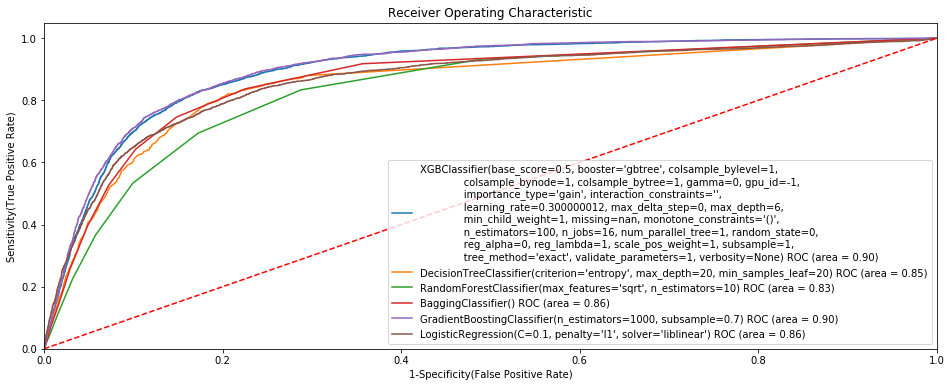

In [20]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

model_list = ['XGBClassifier', 'DecisionTree', 'Random Forest', 'BaggingClassifier', 'GradientBoostingClassifier', 'LogisticRegression']
acc_list = []
prec_list = []
rec_list = []
auc_list = []
cm_list = []
f1_list = []
#result_table = pd.DataFrame(columns=['model_list', 'fpr','tpr','auc'])

plt.figure(figsize=(16,6))
for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    yproba = model.predict_proba(X_test)[::,1]
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    prec_list.append(precision_score(y_test, y_pred))
    rec_list.append(recall_score(y_test, y_pred))
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    #result_table = result_table.append({'model_list':model,'fpr':fpr, 'tpr':tpr, 'auc':auc}, ignore_index=True)
    auc_list.append(roc_auc_score(y_test, y_pred))
    cm_list.append(confusion_matrix(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (model, auc))
    
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display
#result_table.set_index('model_list', inplace=True)

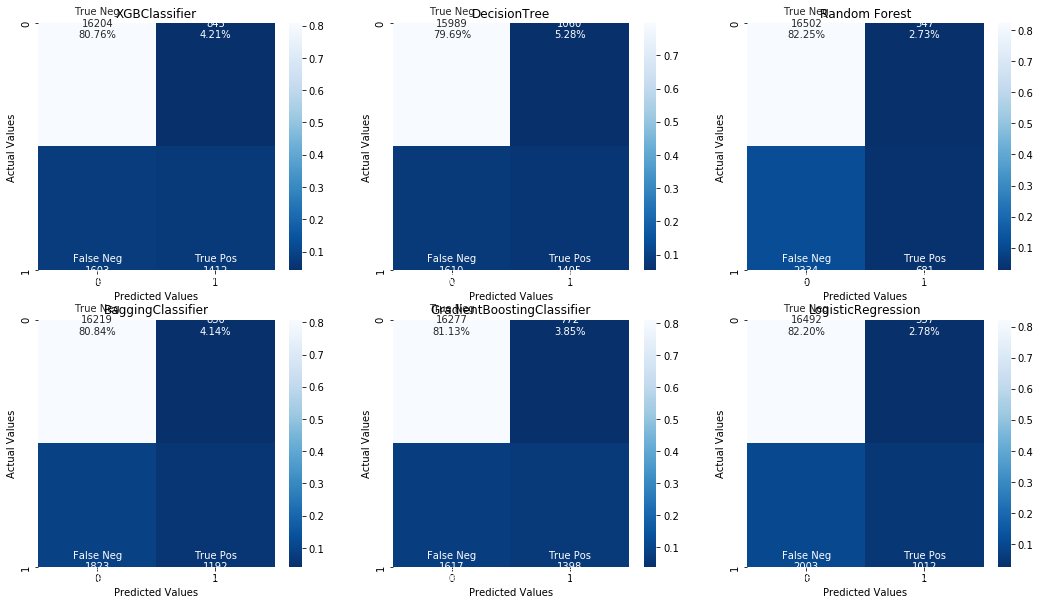

In [21]:
fig = plt.figure(figsize=(18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_pct = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_pct)]
    labels = np.asarray(labels).reshape(2,2)
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm/np.sum(cm), annot=labels, cmap='Blues_r', fmt='')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [22]:
cm_list[0:6]

[array([[16204,   845],
        [ 1603,  1412]]), array([[15989,  1060],
        [ 1610,  1405]]), array([[16502,   547],
        [ 2334,   681]]), array([[16219,   830],
        [ 1823,  1192]]), array([[16277,   772],
        [ 1617,  1398]]), array([[16492,   557],
        [ 2003,  1012]])]

In [23]:
result_df = pd.DataFrame({'Model' :model_list, 'Accuracy': acc_list, 'Precision': prec_list, 'Recall': rec_list
                         , 'F1': f1_list,  'AUC': auc_list}) 
result_df

,Model,Accuracy,Precision,Recall,F1,AUC
0,XGBClassifier,0.877990,0.625609,0.468325,0.535660,0.709381
1,DecisionTree,0.866926,0.569980,0.466003,0.512774,0.701915
2,Random Forest,0.856409,0.554560,0.225871,0.320999,0.596893
3,BaggingClassifier,0.867773,0.589515,0.395357,0.473298,0.673337
4,GradientBoostingClassifier,0.880931,0.644240,0.463682,0.539248,0.709200
5,LogisticRegression,0.872408,0.644997,0.335655,0.441536,0.651492


In [24]:
#result_df.to_csv("result_model.csv")
import pickle
pickle.dump(model_pipeline[0], open('Model_NBO_populasi3_wm_XGB.pkl', 'wb'))
pickle.dump(model_pipeline[1], open('Model_NBO_populasi3_wm_DecisionTree.pkl', 'wb'))
pickle.dump(model_pipeline[2], open('Model_NBO_populasi3_wm_Random Forest.pkl', 'wb'))
pickle.dump(model_pipeline[3], open('Model_NBO_populasi3_wm_BaggingClassifier.pkl', 'wb'))
pickle.dump(model_pipeline[4], open('Model_NBO_populasi3_wm_GradientBoosting.pkl', 'wb'))
pickle.dump(model_pipeline[5], open('Model_NBO_populasi3_wm_LogisticRegression.pkl', 'wb'))

In [48]:
#XGBClassifier
#Feature Importance XGBClassifier
column_labels = X_test.columns.tolist()
coef_XGB = model_pipeline[0].feature_importances_.squeeze().tolist()
FI_XGB = pd.DataFrame(
    {'Feature': column_labels,
     'Coef': coef_XGB})
FI_XGB.sort_values(by=['Coef'], inplace=True, ascending=False)
FI_XGB['Coef'] = FI_XGB['Coef'].apply(lambda x: '%.10f' % x)
FI_XGB.head(15)

,Feature,Coef
1,PPC,0.0352411158
11,AUM,0.0310124345
38,avg_bal_ca_L1M,0.0306598339
53,avg_outstanding_L6M,0.0292464029
13,CA_Balance,0.0283057671
19,TD_Balance,0.0214840230
14,COUNT_CA,0.0194848198
59,avg_bal_mg_L6M,0.0159758832
43,avg_outstanding_L3M,0.0132671557
15,CURR_BAL_CA,0.0106452536


In [49]:
#Feature Importance Decision Tree
column_labels = X_test.columns.tolist()
coef_DT = model_pipeline[1].feature_importances_.squeeze().tolist()
FI_DT = pd.DataFrame(
    {'Feature': column_labels,
     'Coef': coef_DT})
FI_DT.sort_values(by=['Coef'], inplace=True, ascending=False)
FI_DT['Coef'] = FI_DT['Coef'].apply(lambda x: '%.10f' % x)
FI_DT.head(15)

,Feature,Coef
11,AUM,0.2737611651
1,PPC,0.1768808956
53,avg_outstanding_L6M,0.0556285335
18,CURR_BAL_SA,0.0346945413
46,avg_bal_td_L3M,0.0298354785
56,avg_bal_td_L6M,0.0285206792
41,latest_product_month,0.0231573325
14,COUNT_CA,0.0192414647
52,avg_AUM_L6M,0.0189641309
39,avg_bal_sa_L1M,0.0185029293


In [50]:
#Feature Importance Random Forest
column_labels = X_test.columns.tolist()
coef_RF = model_pipeline[2].feature_importances_.squeeze().tolist()
FI_RF = pd.DataFrame(
    {'Feature': column_labels,
     'Coef': coef_RF})
FI_RF.sort_values(by=['Coef'], inplace=True, ascending=False)
FI_RF['Coef'] = FI_RF['Coef'].apply(lambda x: '%.10f' % x)
FI_RF.head(15)

,Feature,Coef
1,PPC,0.0711751844
52,avg_AUM_L6M,0.0458866329
42,avg_AUM_L3M,0.0442843523
11,AUM,0.0377173293
45,avg_bal_sa_L3M,0.0290287121
55,avg_bal_sa_L6M,0.0256542163
18,CURR_BAL_SA,0.0243915956
39,avg_bal_sa_L1M,0.0238757170
41,latest_product_month,0.0223922192
56,avg_bal_td_L6M,0.0205604715


In [51]:
#Feature Importance BaggingClassifier
column_labels = X_test.columns.tolist()
from sklearn.inspection import permutation_importance
results = permutation_importance(model_pipeline[3], X_test, y_test, scoring='accuracy') 

FI_BC = pd.DataFrame(
    {'Feature': column_labels,
     'Coef': results.importances_mean})
FI_BC.sort_values(by=['Coef'], inplace=True, ascending=False)
FI_BC['Coef'] = FI_BC['Coef'].apply(lambda x: '%.10f' % x)
FI_BC.head(15)

,Feature,Coef
11,AUM,0.1224182616
1,PPC,0.0720992823
56,avg_bal_td_L6M,0.0295055821
18,CURR_BAL_SA,0.0129884370
52,avg_AUM_L6M,0.0050538278
46,avg_bal_td_L3M,0.0038875598
14,COUNT_CA,0.0034788676
53,avg_outstanding_L6M,0.0030502392
45,avg_bal_sa_L3M,0.0028309410
21,CURR_BAL_TD,0.0026016746


In [52]:
#Gradient Boosting
# perform permutation importance
from sklearn.inspection import permutation_importance
results = permutation_importance(model_pipeline[4], X_test, y_test, scoring='accuracy') 

FI_GB = pd.DataFrame(
    {'Feature': column_labels,
     'Coef': results.importances_mean})
FI_GB.sort_values(by=['Coef'], inplace=True, ascending=False)
FI_GB['Coef'] = FI_GB['Coef'].apply(lambda x: '%.10f' % x)
FI_GB.head(15)

,Feature,Coef
56,avg_bal_td_L6M,0.0822567783
52,avg_AUM_L6M,0.0616128389
1,PPC,0.0601475279
55,avg_bal_sa_L6M,0.0379784689
341,PMOBX_amt_L6M,0.0231459330
247,PMOBX_amt_L3M,0.0135366826
31,CURR_OTD_MG,0.0098783892
12,outstanding,0.0096590909
46,avg_bal_td_L3M,0.0066786284
42,avg_AUM_L3M,0.0055422648


In [53]:
#Feature Importance Logistic Regression
column_labels = X_test.columns.tolist()
coef_LR = model_pipeline[5].coef_.squeeze().tolist()
FI_LR = pd.DataFrame(
    {'Feature': column_labels,
     'Coef': coef_LR})
FI_LR.sort_values(by=['Coef'], inplace=True, ascending=False)
FI_LR['Coef'] = FI_LR['Coef'].apply(lambda x: '%.10f' % x)
FI_LR.head(15)

,Feature,Coef
1,PPC,1.2605957653
13,CA_Balance,0.1976744540
19,TD_Balance,0.1785364863
320,cc_retail_services_freq_L6M,0.0803068145
116,cc_health_care_freq,0.0728468520
118,cc_home_improvement_supply_freq,0.0723243808
62,casa_cash_deposit_freq,0.0699521032
100,cc_discount_stores_freq,0.0595588665
334,Branch_freq_L6M,0.0583032530
258,casa_payment_freq_L6M,0.0581640047


In [88]:
probs_test = model_pipeline[0].predict_proba(X_test)
y_test = y_test.reset_index(drop=True)
probs_test = pd.DataFrame(probs_test)[1]
probs_test = pd.concat([y_test, probs_test], axis=1)
probs_test.columns = ['actual','Probability']
probs_test['Decile'] = 10 - pd.qcut(probs_test['Probability'], 10,
                            labels = False)
print(probs_test)

       actual  Probability  Decile
0         1.0     0.765880       1
1         0.0     0.003871       8
2         0.0     0.107509       4
3         0.0     0.030322       5
4         0.0     0.194499       3
...       ...          ...     ...
20059     1.0     0.768423       1
20060     0.0     0.066822       4
20061     1.0     0.423217       2
20062     0.0     0.150154       3
20063     0.0     0.007459       7

[20064 rows x 3 columns]


In [90]:
probs_test.to_excel(r'Test_WM.xlsx', index = False)

In [96]:
X_all = df.drop(labels=['period','gcn_number','no_td','no_mtg','no_cc','no_pl','no_ol','no_wm',
                               'wm','BOND','MF','BA','TD','MTG','CC','PL','OL',
                               'BA_Balance','COUNT_BA','CURR_BAL_BA','MF_Balance','COUNT_MF','CURR_BAL_MF','BOND_Balance','COUNT_BOND','CURR_BAL_BOND',
                               'avg_bal_ba_L3M','avg_bal_mf_L3M','avg_bal_bond_L3M','avg_bal_ba_L6M','avg_bal_mf_L6M','avg_bal_bond_L6M',
                               'mf_subs_freq','mf_subs_amt','mf_redem_freq','mf_redem_amt','bond_buy_freq','bond_buy_amt','bond_sell_freq','bond_sell_amt',
                               'mf_subs_freq_L3M','mf_subs_amt_L3M','mf_redem_freq_L3M','mf_redem_amt_L3M','bond_buy_freq_L3M','bond_buy_amt_L3M','bond_sell_freq_L3M','bond_sell_amt_L3M',
                               'mf_subs_freq_L6M','mf_subs_amt_L6M','mf_redem_freq_L6M','mf_redem_amt_L6M','bond_buy_freq_L6M','bond_buy_amt_L6M','bond_sell_freq_L6M','bond_sell_amt_L6M' 
                               ,'COUNT_MG','MG_Outstanding'
                              ], axis=1)
y_all = df['wm']
probs_all = model_pipeline[0].predict_proba(X_all)
y_all = y_all.reset_index(drop=True)
probs_all = pd.DataFrame(probs_all)[1]
probs_all = pd.concat([y_all, probs_all], axis=1)
probs_all.columns = ['actual','Probability']
probs_all['Decile'] = 10 - pd.qcut(probs_all['Probability'], 10,
                            labels = False)
print(probs_all)

        actual  Probability  Decile
0          0.0     0.004275       8
1          0.0     0.002405       9
2          0.0     0.154102       2
3          0.0     0.099833       3
4          0.0     0.105566       3
...        ...          ...     ...
149605     0.0     0.004933       8
149606     0.0     0.069074       3
149607     0.0     0.077875       3
149608     0.0     0.262308       2
149609     0.0     0.003531       8

[149610 rows x 3 columns]


In [97]:
probs_all.to_excel(r'All_WM.xlsx', index = False)

In [98]:
cm_all = []
for model in model_pipeline:
    y_pall = model.predict(X_all)
    cm_all.append(confusion_matrix(y_all, y_pall))

In [99]:
cm_all[0:6]

[array([[135965,   6107],
        [  2516,   5022]]), array([[133640,   8432],
        [  3299,   4239]]), array([[138330,   3742],
        [  2608,   4930]]), array([[136297,   5775],
        [  2105,   5433]]), array([[136273,   5799],
        [  3100,   4438]]), array([[137593,   4479],
        [  4952,   2586]])]

In [35]:
df1 , meta = pyreadstat.read_sas7bdat('dataset_wm_validasi.sas7bdat')
columns1 = ['PPC','latest_product_month','age','vintage_month','AUM','outstanding','COUNT_CA','CURR_BAL_CA','COUNT_SA','CURR_BAL_SA','COUNT_TD','CURR_BAL_TD','short_tenor_day','long_tenor_day','COUNT_BA','CURR_BAL_BA','COUNT_MF','CURR_BAL_MF','COUNT_BOND','CURR_BAL_BOND','COUNT_CC','CURR_OTD_CC','cc_available_crd_lmt_pct','COUNT_PL','CURR_OTD_PL','COUNT_MG','CURR_OTD_MG','COUNT_JF','CURR_OTD_JF','COUNT_OL','CURR_OTD_OL','avg_bal_ca_L1M','avg_bal_sa_L1M','avg_AUM_L3M','avg_outstanding_L3M','avg_bal_ca_L3M','avg_bal_sa_L3M','avg_bal_td_L3M','avg_bal_ba_L3M','avg_bal_mf_L3M','avg_bal_bond_L3M','avg_bal_cc_L3M','avg_bal_pl_L3M','avg_bal_mg_L3M','avg_bal_jf_L3M','avg_bal_ol_L3M','avg_AUM_L6M','avg_outstanding_L6M','avg_bal_ca_L6M','avg_bal_sa_L6M','avg_bal_td_L6M','avg_bal_ba_L6M','avg_bal_mf_L6M','avg_bal_bond_L6M','avg_bal_cc_L6M','avg_bal_pl_L6M','avg_bal_mg_L6M','avg_bal_jf_L6M','avg_bal_ol_L6M','casa_cash_deposit_freq','casa_cash_deposit_amt','casa_cash_withdrawal_freq','casa_cash_withdrawal_amt',
            'casa_transfer_out_freq','casa_transfer_out_amt','casa_transfer_in_freq','casa_transfer_in_amt','casa_payment_freq','casa_payment_amt','casa_purchase_freq','casa_purchase_amt','casa_overbooking_out_freq','casa_overbooking_out_amt','cc_cash_advance_freq','cc_cash_advance_amt','cc_payment_freq','cc_payment_amt','cc_installment_freq','cc_installment_amt','cc_purchase_ecom_freq','cc_purchase_ecom_amt','cc_purchase_edc_freq','cc_purchase_edc_amt','cc_purchase_reg_freq','cc_purchase_reg_amt','cc_airlines_freq','cc_airlines_amt','cc_apparel_accessories_freq','cc_apparel_accessories_amt','cc_automotive_freq','cc_automotive_amt','cc_business_to_business_freq','cc_business_to_business_amt','cc_department_stores_freq','cc_department_stores_amt','cc_direct_marketing_freq','cc_direct_marketing_amt','cc_discount_stores_freq','cc_discount_stores_amt','cc_drug_stores_pharmacies_freq','cc_drug_stores_pharmacies_amt','cc_education_government_freq','cc_education_government_amt','cc_electronics_freq','cc_electronics_amt',
            'cc_entertainment_freq','cc_entertainment_amt','cc_fast_food_freq','cc_fast_food_amt','cc_food_grocery_freq','cc_food_grocery_amt','cc_fuel_freq','cc_fuel_amt','cc_health_care_freq','cc_health_care_amt','cc_home_improvement_supply_freq','cc_home_improvement_supply_amt','cc_hotels_freq','cc_hotels_amt','cc_insurance_freq','cc_insurance_amt','cc_online_market_place_freq','cc_online_market_place_amt','cc_professional_services_freq','cc_professional_services_amt','cc_restaurants_freq','cc_restaurants_amt','cc_retail_goods_freq','cc_retail_goods_amt','cc_retail_services_freq','cc_retail_services_amt','cc_telecom_utilities_freq','cc_telecom_utilities_amt','cc_transportation_freq','cc_transportation_amt','cc_travel_services_freq','cc_travel_services_amt','cc_vehicle_rental_freq','cc_vehicle_rental_amt','cc_wholesale_clubs_freq','cc_wholesale_clubs_amt','mf_subs_freq','mf_subs_amt','mf_redem_freq','mf_redem_amt','bond_buy_freq','bond_buy_amt','bond_sell_freq','bond_sell_amt','ATM_freq','ATM_amt','Branch_freq',
            'Branch_amt','API_freq','API_amt','PEB_freq','PEB_amt','PMOBX_freq','PMOBX_amt','PNET_freq','PNET_amt','casa_cash_deposit_freq_L3M','casa_cash_deposit_amt_L3M','casa_cash_withdrawal_freq_L3M','casa_cash_withdrawal_amt_L3M','casa_transfer_out_freq_L3M','casa_transfer_out_amt_L3M','casa_transfer_in_freq_L3M','casa_transfer_in_amt_L3M','casa_payment_freq_L3M','casa_payment_amt_L3M','casa_purchase_freq_L3M','casa_purchase_amt_L3M','casa_overbooking_out_freq_L3M','casa_overbooking_out_amt_L3M','cc_cash_advance_freq_L3M','cc_cash_advance_amt_L3M','cc_payment_freq_L3M','cc_payment_amt_L3M','cc_installment_freq_L3M','cc_installment_amt_L3M','cc_purchase_ecom_freq_L3M','cc_purchase_ecom_amt_L3M','cc_purchase_edc_freq_L3M','cc_purchase_edc_amt_L3M','cc_purchase_reg_freq_L3M','cc_purchase_reg_amt_L3M','cc_airlines_freq_L3M','cc_airlines_amt_L3M','cc_apparel_accessories_freq_L3M','cc_apparel_accessories_amt_L3M','cc_automotive_freq_L3M','cc_automotive_amt_L3M','cc_business_to_business_freq_L3M',
            'cc_business_to_business_amt_L3M','cc_department_stores_freq_L3M','cc_department_stores_amt_L3M','cc_direct_marketing_freq_L3M','cc_direct_marketing_amt_L3M','cc_discount_stores_freq_L3M','cc_discount_stores_amt_L3M','cc_drug_stores_phar_freq_L3M','cc_drug_stores_phar_amt_L3M','cc_education_government_freq_L3M','cc_education_government_amt_L3M','cc_electronics_freq_L3M','cc_electronics_amt_L3M','cc_entertainment_freq_L3M','cc_entertainment_amt_L3M','cc_fast_food_freq_L3M','cc_fast_food_amt_L3M','cc_food_grocery_freq_L3M','cc_food_grocery_amt_L3M','cc_fuel_freq_L3M','cc_fuel_amt_L3M','cc_health_care_freq_L3M','cc_health_care_amt_L3M','cc_home_impr_supply_freq_L3M','cc_home_impr_supply_amt_L3M','cc_hotels_freq_L3M','cc_hotels_amt_L3M','cc_insurance_freq_L3M','cc_insurance_amt_L3M','cc_online_market_place_freq_L3M','cc_online_market_place_amt_L3M','cc_prof_services_freq_L3M','cc_profl_services_amt_L3M','cc_restaurants_freq_L3M','cc_restaurants_amt_L3M','cc_retail_goods_freq_L3M','cc_retail_goods_amt_L3M',
            'cc_retail_services_freq_L3M','cc_retail_services_amt_L3M','cc_telecom_utilities_freq_L3M','cc_telecom_utilities_amt_L3M','cc_transportation_freq_L3M','cc_transportation_amt_L3M','cc_travel_services_freq_L3M','cc_travel_services_amt_L3M','cc_vehicle_rental_freq_L3M','cc_vehicle_rental_amt_L3M','cc_wholesale_clubs_freq_L3M','cc_wholesale_clubs_amt_L3M','mf_subs_freq_L3M','mf_subs_amt_L3M','mf_redem_freq_L3M','mf_redem_amt_L3M','bond_buy_freq_L3M','bond_buy_amt_L3M','bond_sell_freq_L3M','bond_sell_amt_L3M','ATM_freq_L3M','ATM_amt_L3M','Branch_freq_L3M','Branch_amt_L3M','API_freq_L3M','API_amt_L3M','PEB_freq_L3M','PEB_amt_L3M','PMOBX_freq_L3M','PMOBX_amt_L3M','PNET_freq_L3M','PNET_amt_L3M','casa_cash_deposit_freq_L6M','casa_cash_deposit_amt_L6M','casa_cash_withdrawal_freq_L6M','casa_cash_withdrawal_amt_L6M','casa_transfer_out_freq_L6M','casa_transfer_out_amt_L6M','casa_transfer_in_freq_L6M','casa_transfer_in_amt_L6M','casa_payment_freq_L6M','casa_payment_amt_L6M','casa_purchase_freq_L6M',
            'casa_purchase_amt_L6M','casa_overbooking_out_freq_L6M','casa_overbooking_out_amt_L6M','cc_cash_advance_freq_L6M','cc_cash_advance_amt_L6M','cc_payment_freq_L6M','cc_payment_amt_L6M','cc_installment_freq_L6M','cc_installment_amt_L6M','cc_purchase_ecom_freq_L6M','cc_purchase_ecom_amt_L6M','cc_purchase_edc_freq_L6M','cc_purchase_edc_amt_L6M','cc_purchase_reg_freq_L6M','cc_purchase_reg_amt_L6M','cc_airlines_freq_L6M','cc_airlines_amt_L6M','cc_apparel_accessories_freq_L6M','cc_apparel_accessories_amt_L6M','cc_automotive_freq_L6M','cc_automotive_amt_L6M','cc_business_to_business_freq_L6M','cc_business_to_business_amt_L6M','cc_department_stores_freq_L6M','cc_department_stores_amt_L6M','cc_direct_marketing_freq_L6M','cc_direct_marketing_amt_L6M','cc_discount_stores_freq_L6M','cc_discount_stores_amt_L6M','cc_drug_stores_phar_freq_L6M','cc_drug_stores_phar_amt_L6M','cc_education_government_freq_L6M','cc_education_government_amt_L6M','cc_electronics_freq_L6M','cc_electronics_amt_L6M','cc_entertainment_freq_L6M',
            'cc_entertainment_amt_L6M','cc_fast_food_freq_L6M','cc_fast_food_amt_L6M','cc_food_grocery_freq_L6M','cc_food_grocery_amt_L6M','cc_fuel_freq_L6M','cc_fuel_amt_L6M','cc_health_care_freq_L6M','cc_health_care_amt_L6M','cc_home_impr_supply_freq_L6M','cc_home_impr_supply_amt_L6M','cc_hotels_freq_L6M','cc_hotels_amt_L6M','cc_insurance_freq_L6M','cc_insurance_amt_L6M','cc_online_market_place_freq_L6M','cc_online_market_place_amt_L6M','cc_prof_services_freq_L6M','cc_prof_services_amt_L6M','cc_restaurants_freq_L6M','cc_restaurants_amt_L6M','cc_retail_goods_freq_L6M','cc_retail_goods_amt_L6M','cc_retail_services_freq_L6M','cc_retail_services_amt_L6M','cc_telecom_utilities_freq_L6M','cc_telecom_utilities_amt_L6M','cc_transportation_freq_L6M','cc_transportation_amt_L6M','cc_travel_services_freq_L6M','cc_travel_services_amt_L6M','cc_vehicle_rental_freq_L6M','cc_vehicle_rental_amt_L6M','cc_wholesale_clubs_freq_L6M','cc_wholesale_clubs_amt_L6M','mf_subs_freq_L6M','mf_subs_amt_L6M','mf_redem_freq_L6M','mf_redem_amt_L6M',
            'bond_buy_freq_L6M','bond_buy_amt_L6M','bond_sell_freq_L6M','bond_sell_amt_L6M','ATM_freq_L6M','ATM_amt_L6M','Branch_freq_L6M','Branch_amt_L6M','API_freq_L6M','API_amt_L6M','PEB_freq_L6M','PEB_amt_L6M','PMOBX_freq_L6M','PMOBX_amt_L6M','PNET_freq_L6M','PNET_amt_L6M'
          ]
df1[columns1] = df1[columns1].fillna(0)
df1 = df1.replace(r'^\s*$', '0. No Data', regex=True)
df1.head()

,period,gcn_number,no_td,no_mtg,no_cc,no_pl,no_ol,no_wm,wm,BOND,...,Branch_freq_L6M,Branch_amt_L6M,API_freq_L6M,API_amt_L6M,PEB_freq_L6M,PEB_amt_L6M,PMOBX_freq_L6M,PMOBX_amt_L6M,PNET_freq_L6M,PNET_amt_L6M
0,2204.0,A9A0410000000057,Y,Y,Y,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2.493271e+07,0.0,0.0
1,2204.0,A9A0510000000055,Y,Y,N,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.666667,8.753333e+05,0.0,0.0
2,2204.0,A9A0710000000045,N,Y,N,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0
3,2204.0,A9A0810000000052,N,Y,Y,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0
4,2204.0,A9A0920000000008,N,Y,Y,Y,Y,Y,0.0,0.0,...,1.0,5819000.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0


In [36]:
pkl_file = open('encoders_populasi3_wm.pkl', 'rb')
encoders1 = pickle.load(pkl_file) 
pkl_file.close()

In [37]:
for col in encode_columns:
    df1[col] = df1[col].map(lambda s: '<unknown>' if s not in encoders1.get(col).classes_ else s)
    encoders1.get(col).classes_ = np.append(encoders1.get(col).classes_, '<unknown>')
    df1[col] = encoders1.get(col).transform(df1[col])

In [38]:
df1.head()

,period,gcn_number,no_td,no_mtg,no_cc,no_pl,no_ol,no_wm,wm,BOND,...,Branch_freq_L6M,Branch_amt_L6M,API_freq_L6M,API_amt_L6M,PEB_freq_L6M,PEB_amt_L6M,PMOBX_freq_L6M,PMOBX_amt_L6M,PNET_freq_L6M,PNET_amt_L6M
0,2204.0,A9A0410000000057,Y,Y,Y,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2.493271e+07,0.0,0.0
1,2204.0,A9A0510000000055,Y,Y,N,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.666667,8.753333e+05,0.0,0.0
2,2204.0,A9A0710000000045,N,Y,N,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0
3,2204.0,A9A0810000000052,N,Y,Y,Y,Y,Y,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0
4,2204.0,A9A0920000000008,N,Y,Y,Y,Y,Y,0.0,0.0,...,1.0,5819000.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0


In [41]:
#df1 = label_encode_columns_w_fit_encoders(df=df1, columns=encode_columns, encoders=encoders)
X_pred = df1.drop(labels=['period','gcn_number','no_td','no_mtg','no_cc','no_pl','no_ol','no_wm',
                         'wm','BOND','MF','BA','TD','MTG','CC','PL','OL',
                         'BA_Balance','COUNT_BA','CURR_BAL_BA','MF_Balance','COUNT_MF','CURR_BAL_MF','BOND_Balance','COUNT_BOND','CURR_BAL_BOND',
                         'avg_bal_ba_L3M','avg_bal_mf_L3M','avg_bal_bond_L3M','avg_bal_ba_L6M','avg_bal_mf_L6M','avg_bal_bond_L6M',
                         'mf_subs_freq','mf_subs_amt','mf_redem_freq','mf_redem_amt','bond_buy_freq','bond_buy_amt','bond_sell_freq','bond_sell_amt',
                         'mf_subs_freq_L3M','mf_subs_amt_L3M','mf_redem_freq_L3M','mf_redem_amt_L3M','bond_buy_freq_L3M','bond_buy_amt_L3M','bond_sell_freq_L3M','bond_sell_amt_L3M',
                         'mf_subs_freq_L6M','mf_subs_amt_L6M','mf_redem_freq_L6M','mf_redem_amt_L6M','bond_buy_freq_L6M','bond_buy_amt_L6M','bond_sell_freq_L6M','bond_sell_amt_L6M' 
                         ,'COUNT_MG','MG_Outstanding'], axis=1)
print(X_pred.shape)
X_pred.head()
y_val = df1['wm']
print(y_val.shape)

(17399, 344)
(17399,)


In [40]:
GCN = df1[['gcn_number','wm']]
GCN = GCN.reset_index(drop=True)
probs = model_pipeline[0].predict_proba(X_pred)
probs = pd.DataFrame(probs)[1]
probs = pd.concat([GCN, probs], axis=1)
probs.columns = ['GCN','actual','Probability']

In [60]:
probs.head()

,GCN,actual,Probability
0,A9A0410000000057,0.0,0.008674
1,A9A0510000000055,0.0,0.003472
2,A9A0710000000045,0.0,0.174017
3,A9A0810000000052,0.0,0.092766
4,A9A0920000000008,0.0,0.071261


In [61]:
probs['Decile'] = 10 - pd.qcut(probs['Probability'], 10,
                            labels = False)
print(probs)

                    GCN  actual  Probability  Decile
0      A9A0410000000057     0.0     0.008674       6
1      A9A0510000000055     0.0     0.003472       8
2      A9A0710000000045     0.0     0.174017       1
3      A9A0810000000052     0.0     0.092766       2
4      A9A0920000000008     0.0     0.071261       2
...                 ...     ...          ...     ...
17394  ZYC0610000000002     0.0     0.008345       6
17395  ZYL0910000000001     0.0     0.010906       5
17396  ZYM0910000000002     0.0     0.028488       4
17397  ZYR0210000000002     0.0     0.007350       6
17398  ZYS0610000000006     0.0     0.014043       5

[17399 rows x 4 columns]


In [63]:
probs.to_excel(r'Validation_WM_202204.xlsx', index = False)

In [69]:
y_pred = df1['wm']
print(df1.wm.value_counts())
y_pred.head()

0.0    17225
1.0      174
Name: wm, dtype: int64


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: wm, dtype: float64

In [65]:
cm_l = []
for model in model_pipeline:
    y_p = model.predict(X_pred)
    cm_l.append(confusion_matrix(y_pred, y_p))

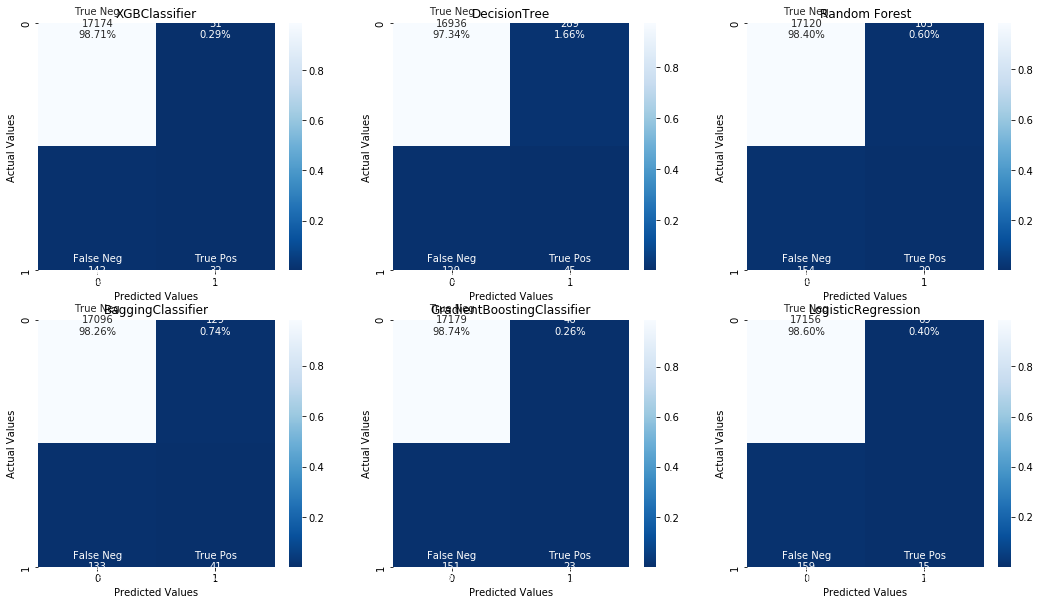

In [66]:
fig = plt.figure(figsize=(18,10))
for i in range(len(cm_l)):
    cm = cm_l[i]
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_pct = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_pct)]
    labels = np.asarray(labels).reshape(2,2)
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm/np.sum(cm), annot=labels, cmap='Blues_r', fmt='')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [67]:
cm_l[0:6]

[array([[17174,    51],
        [  142,    32]]), array([[16936,   289],
        [  129,    45]]), array([[17120,   105],
        [  154,    20]]), array([[17096,   129],
        [  133,    41]]), array([[17179,    46],
        [  151,    23]]), array([[17156,    69],
        [  159,    15]])]

In [62]:
result = (probs.groupby(["Decile"])
             .agg(Total_GCN=('Probability','count'),
                  Min_Proba=("Probability", 'min'),
                  Max_Proba=("Probability", 'max'))
             .reset_index().round(5))
#pd.set_option("display.precision", 5)
print(result)

   Decile  Total_GCN  Min_Proba  Max_Proba
0       1       1740    0.12770    0.82654
1       2       1740    0.06162    0.12769
2       3       1740    0.03221    0.06161
3       4       1740    0.01796    0.03220
4       5       1739    0.01082    0.01796
5       6       1740    0.00694    0.01082
6       7       1740    0.00457    0.00694
7       8       1740    0.00297    0.00457
8       9       1740    0.00181    0.00297
9      10       1740    0.00006    0.00181


In [99]:
probs['Proba_decile'] = np.select(
    [
        probs['Probability'].between(.9, 1, inclusive=True),
        probs['Probability'].between(.8, .9, inclusive=True),
        probs['Probability'].between(.7, .8, inclusive=True),
        probs['Probability'].between(.6, .7, inclusive=True),
        probs['Probability'].between(.5, .6, inclusive=True),
        probs['Probability'].between(.4, .5, inclusive=True),
        probs['Probability'].between(.3, .4, inclusive=True),
        probs['Probability'].between(.2, .3, inclusive=True),
        probs['Probability'].between(.1, .2, inclusive=True),
        probs['Probability'].between(0, .1, inclusive=True)
    ], 
    [
        '0.9 - 1', 
        '0.8 - 0.9', 
        '0.7 - 0.8',
        '0.6 - 0.7', 
        '0.5 - 0.6',
        '0.4 - 0.5', 
        '0.3 - 0.4',
        '0.2 - 0.3', 
        '0.1 - 0.2', 
        '0 - 0.1'
    ], 
    default='Unknown'
)

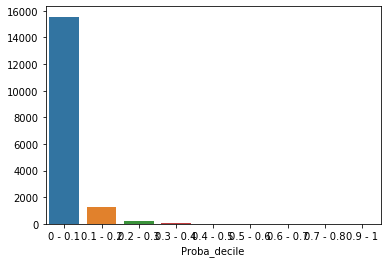

In [100]:
result = probs.groupby(['Proba_decile'], sort = True).size()
sns.barplot(x = result.index, y = result.values);

In [101]:
probs.groupby(["Proba_decile"]).agg(Total_GCN=('GCN','count'))

,Total_GCN
Proba_decile,
0 - 0.1,15554
0.1 - 0.2,1251
0.2 - 0.3,215
0.3 - 0.4,69
0.4 - 0.5,17
0.5 - 0.6,11
0.6 - 0.7,9
0.7 - 0.8,9
0.9 - 1,12


In [26]:
import pickle
XGB = pickle.load(open('Model_NBO_populasi3_wm_XGB.pkl', 'rb'))
DT = pickle.load(open('Model_NBO_populasi3_wm_DecisionTree.pkl', 'rb'))
RF = pickle.load(open('Model_NBO_populasi3_wm_Random Forest.pkl', 'rb'))
BC = pickle.load(open('Model_NBO_populasi3_wm_BaggingClassifier.pkl', 'rb'))
GB = pickle.load(open('Model_NBO_populasi3_wm_GradientBoosting.pkl', 'rb'))
LR = pickle.load(open('Model_NBO_populasi3_wm_LogisticRegression.pkl', 'rb'))

In [44]:
print('threshold > .3: ')
y_pred = (DT.predict_proba(X_test)[:,1] > 0.3)
print('accuracy score = '+ str(metrics.accuracy_score(y_test, y_pred)))
print('precision score = '+ str(precision_score(y_test, y_pred)))
print('recall score = ' + str(recall_score(y_test, y_pred)))
print('confusion matrix: ')
print(confusion_matrix(y_test, y_pred))
print('threshold > .5: ')
y_pred = (DT.predict_proba(X_test)[:,1] > 0.5)
print('accuracy score = '+ str(metrics.accuracy_score(y_test, y_pred)))
print('precision score = '+ str(precision_score(y_test, y_pred)))
print('recall score = ' + str(recall_score(y_test, y_pred)))
print('confusion matrix: ')
print(confusion_matrix(y_test, y_pred))

threshold > .3: 
accuracy score = 0.845743620414673
precision score = 0.4901185770750988
recall score = 0.6580431177446103
confusion matrix: 
[[14985  2064]
 [ 1031  1984]]
threshold > .5: 
accuracy score = 0.8669258373205742
precision score = 0.5699797160243407
recall score = 0.4660033167495854
confusion matrix: 
[[15989  1060]
 [ 1610  1405]]


In [49]:
print('threshold > .3: ')
y_pred = (LR.predict_proba(X_pred)[:,1] > 0.3)
print('accuracy score = '+ str(metrics.accuracy_score(y_val, y_pred)))
print('precision score = '+ str(precision_score(y_val, y_pred)))
print('recall score = ' + str(recall_score(y_val, y_pred)))
print('confusion matrix: ')
print(confusion_matrix(y_val, y_pred))
print('threshold > .5: ')
y_pred = (LR.predict_proba(X_pred)[:,1] > 0.5)
print('accuracy score = '+ str(metrics.accuracy_score(y_val, y_pred)))
print('precision score = '+ str(precision_score(y_val, y_pred)))
print('recall score = ' + str(recall_score(y_val, y_pred)))
print('confusion matrix: ')
print(confusion_matrix(y_val, y_pred))

threshold > .3: 
accuracy score = 0.9775274441059831
precision score = 0.16199376947040497
recall score = 0.2988505747126437
confusion matrix: 
[[16956   269]
 [  122    52]]
threshold > .5: 
accuracy score = 0.9874705442841543
precision score = 0.21052631578947367
recall score = 0.09195402298850575
confusion matrix: 
[[17165    60]
 [  158    16]]


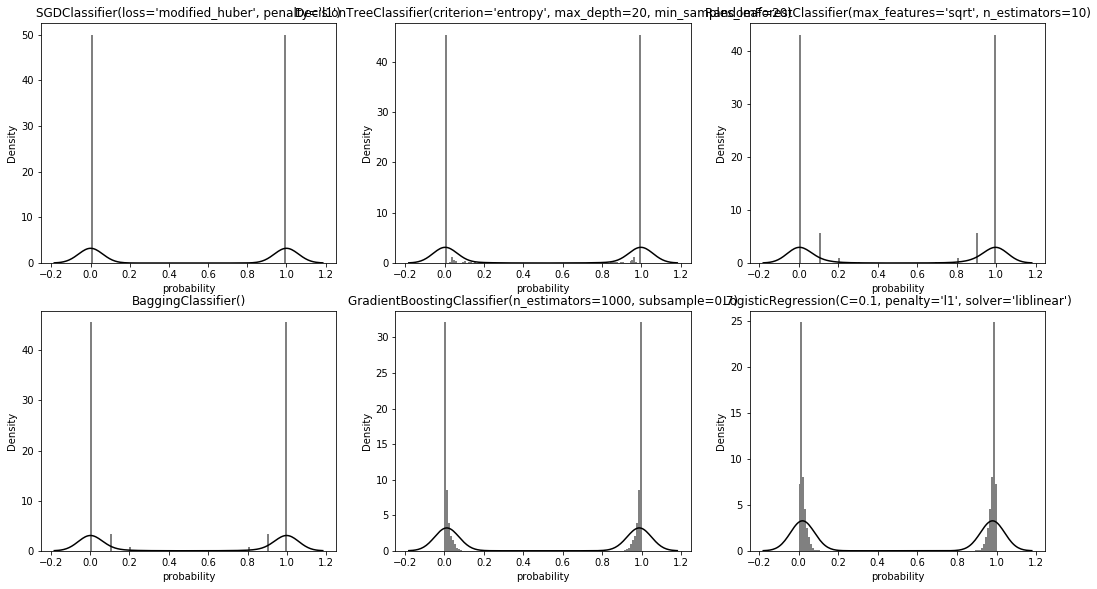

In [62]:
plt.subplots(figsize=(18,15))
count=1
for model in model_pipeline:
    probs = model.predict_proba(X_pred)
    #probs = pd.DataFrame(probs)[1]
    plt.subplot(3, 3, count).set_title(model)
    ax = sns.distplot(probs,
                  kde=True,
                  bins=100,
                  color='black',
                  hist_kws={'alpha':1,'color':'grey'})
    ax.set(xlabel='probability')
    count+=1

In [ ]:
#probs.to_csv("NBO_populasi3_prediction_202205.csv")

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

#def find_best_model_using_gridsearchcv(X,y):
algos = {'KNeighborsClassifier' : {'model': KNeighborsClassifier(),
                                  'params': {'n_neighbors' : range(1, 21, 2),
                                                 'weights' : ['uniform', 'distance'],
                                                  'metric' : ['euclidean', 'manhattan', 'minkowski']}},
         'DecisionTreeClassifier' : {'model': DecisionTreeClassifier(),
                                    'params': {'max_depth': [2, 3, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50, 100],
                                               'criterion': ["gini", "entropy"],
                                                'splitter': ['best']}},
         'RandomForestClassifier' : {'model': RandomForestClassifier(),
                                    'params': {'n_estimators': [10, 100, 1000],
                                               'max_features': ['sqrt', 'log2'],
                                                  'criterion': ['gini', 'entropy', 'log_loss']}},
         'BaggingClassifier' : {'model': BaggingClassifier(),
                                'params': {'n_estimators': [10, 100, 1000]}},
         'GradientBoostingClassifier' : {'model': GradientBoostingClassifier(),
                                    'params': {'n_estimators': [10, 100, 1000],
                                               'learning_rate': [0.001, 0.01, 0.1],
                                              'subsample': [0.5, 0.7, 1.0],
                                               'max_depth': [3, 7, 9]}},
         'LogisticRegression' : {'model': LogisticRegression(),
                                'params': {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                                          'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                                                'C': [100, 10, 1.0, 0.1, 0.01]}},
            }
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
for algo_name, config in algos.items():
    gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, scoring = 'f1_weighted')
    gs.fit(X,y)
    scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    result = pd.DataFrame(scores,columns=['model','best_params','best_score'])
#find_best_model_using_gridsearchcv(X,y)

In [88]:
pd.set_option('display.max_colwidth', 100)
result

,model,best_params,best_score
0,KNeighborsClassifier,"{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}",0.872556
1,DecisionTreeClassifier,"{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 20, 'splitter': 'best'}",0.882001
2,RandomForestClassifier,"{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}",0.877326
3,BaggingClassifier,{'n_estimators': 10},0.882920
4,GradientBoostingClassifier,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}",0.892873
5,LogisticRegression,"{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}",0.868487


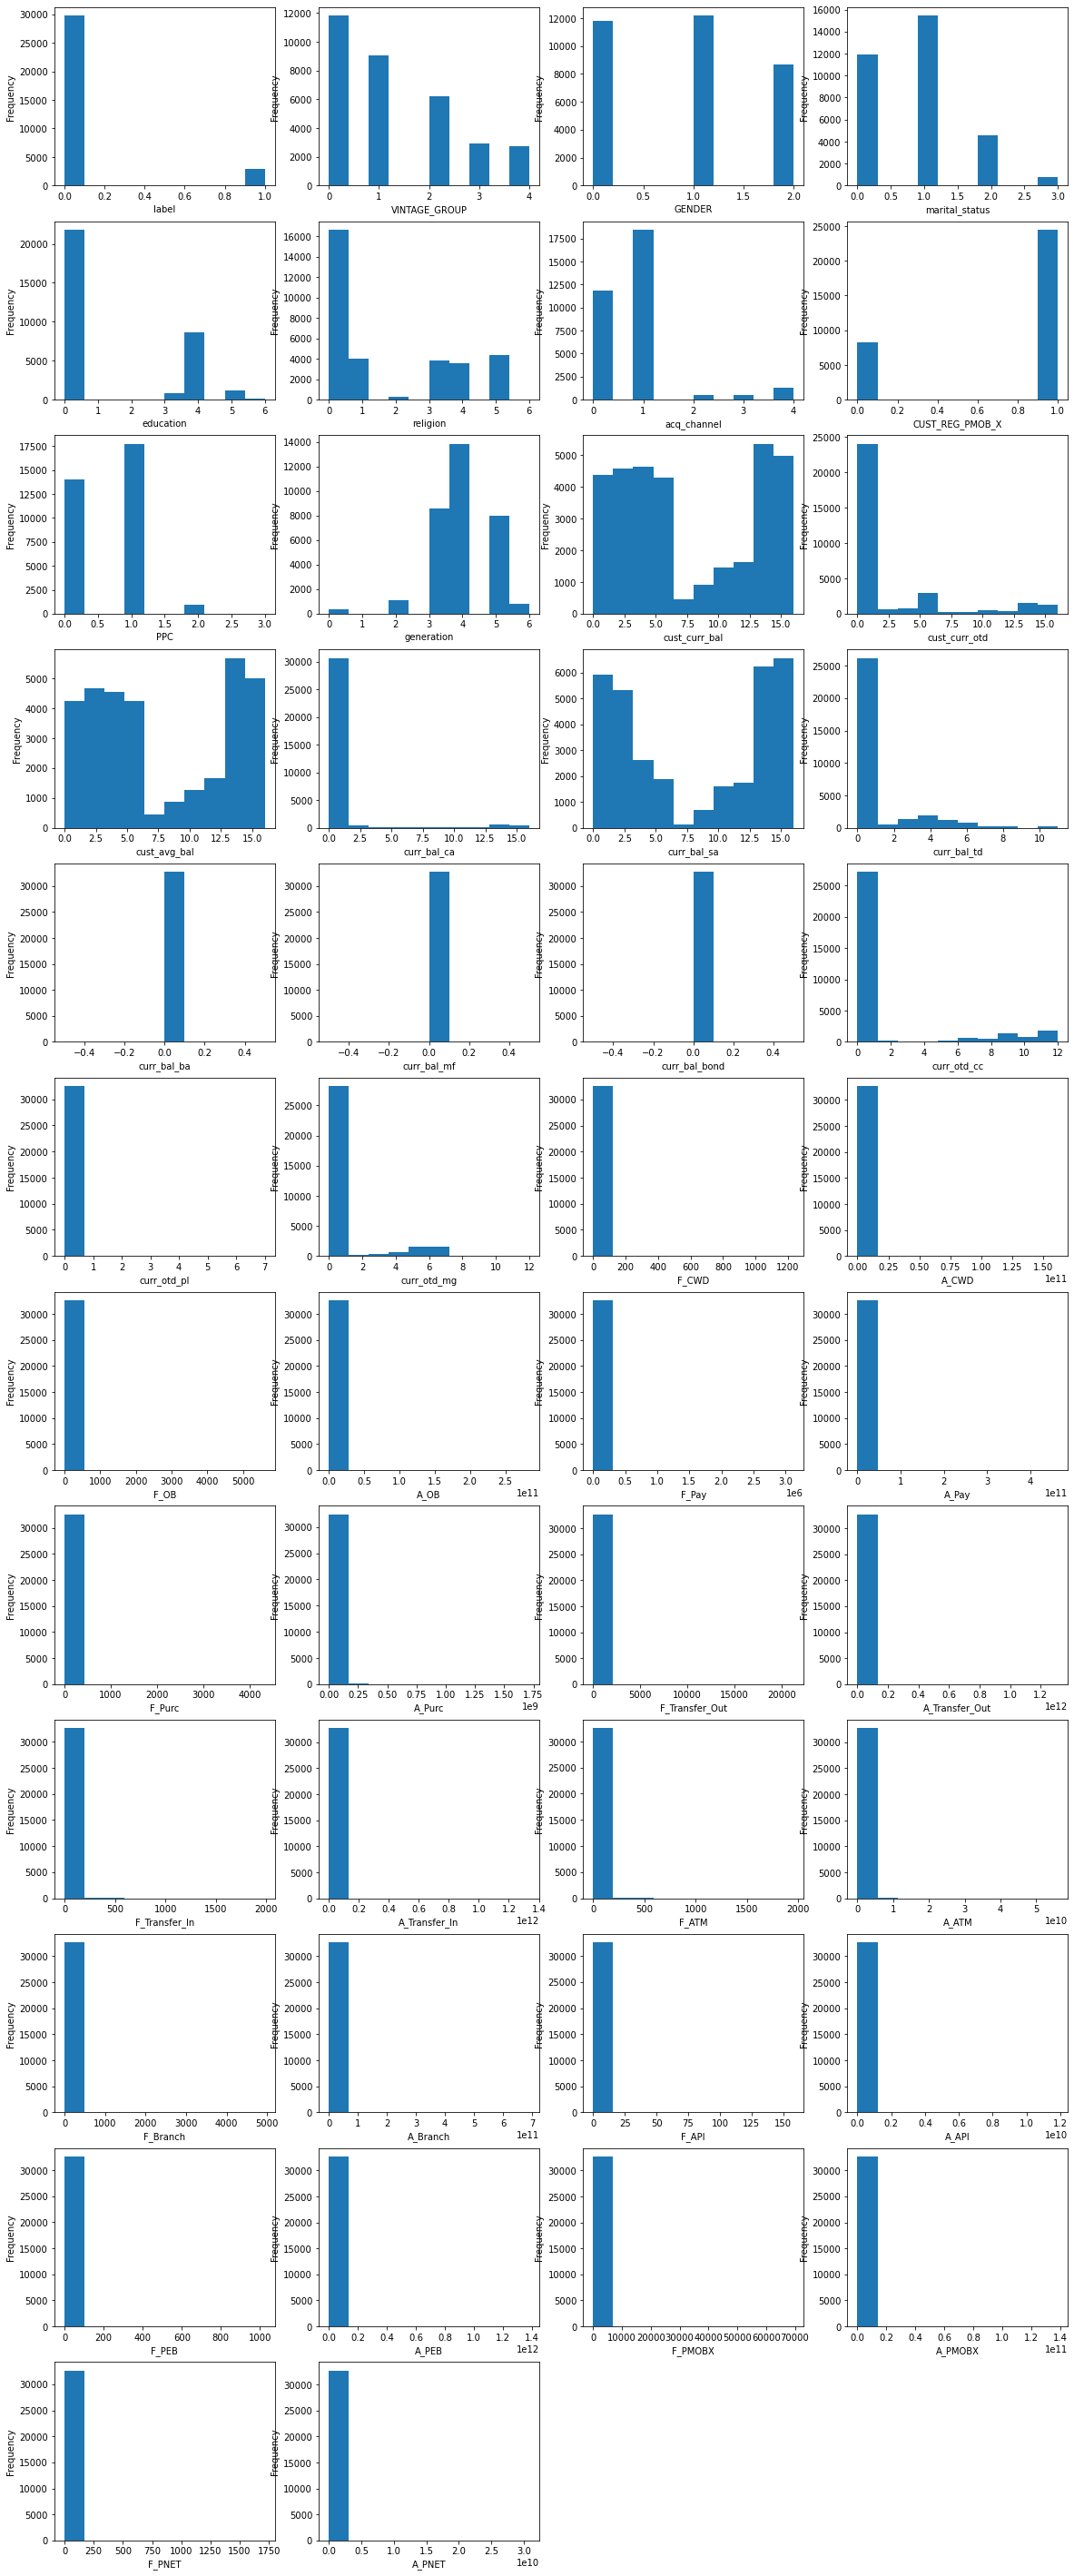

In [43]:
df1 = df[['label','VINTAGE_GROUP', 'GENDER', 'marital_status', 'education',
       'religion', 'acq_channel', 'CUST_REG_PMOB_X', 'PPC', 'generation',
       'cust_curr_bal', 'cust_curr_otd', 'cust_avg_bal', 'curr_bal_ca',
       'curr_bal_sa', 'curr_bal_td', 'curr_bal_ba', 'curr_bal_mf',
       'curr_bal_bond', 'curr_otd_cc', 'curr_otd_pl', 'curr_otd_mg',
       'F_CWD', 'A_CWD', 'F_OB', 'A_OB', 'F_Pay', 'A_Pay', 'F_Purc', 'A_Purc',
       'F_Transfer_Out', 'A_Transfer_Out', 'F_Transfer_In', 'A_Transfer_In',
       'F_ATM', 'A_ATM', 'F_Branch', 'A_Branch', 'F_API', 'A_API', 'F_PEB',
       'A_PEB', 'F_PMOBX', 'A_PMOBX', 'F_PNET', 'A_PNET']]
fig = plt.figure(figsize=(20,60))
i = 0
for column in df1:
    sub = fig.add_subplot(14,4,i+1)
    sub.set_xlabel(column)
    df1[column].plot(kind = 'hist')
    i = i + 1

In [44]:
encoders.get('cust_curr_bal').classes_

array(['1. <50k', '10. 50-100Mn', '11. 100-250Mn', '12. 250-500Mn',
       '13. 500Mn-1Bn', '14. 1-2Bn', '15. 2-5Bn', '16. 5-10Bn',
       '17. >10Bn', '2. 50-100k', '3. 100-250k', '4. 250-500k',
       '5. 500k-1Mn', '6. 1-5Mn', '7. 5-10Mn', '8. 10-25Mn', '9. 25-50Mn'],
      dtype=object)